In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


import tensorflow as tf
from tensorflow import keras 

#학습 시간 확인 
import time 

#텐서플로우 모델 설계 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

# 2. 버전 확인

In [50]:
#버전 확인 

print("tensorflow: ", tf.__version__)
print("numpy: ", np.__version__)

tensorflow:  2.16.1
numpy:  1.26.4


# 그래프 작성

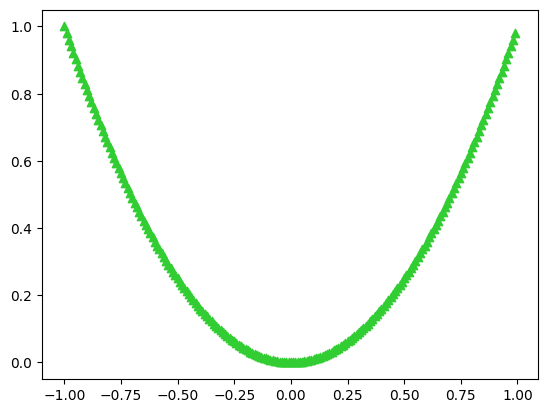

In [84]:

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y, marker='^', color='limegreen')


# 2. 데이터 구조가 어떻게 생겼는지?

In [52]:
print("데이터크기(x) :", len(x))
print("데이터구조(x) :", x.shape)

데이터크기(x) : 200
데이터구조(x) : (200,)


# 2. 간단한 tensorflow 모델생성

In [85]:
#모델 정의 

model = keras.Sequential() 
model.add(Input([1]))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1))

In [86]:
#컴파일 
model.compile(optimizer='SGD', loss ='mse')

In [87]:
#학습 
model.fit(x,y,epochs = 500, verbose = 0, batch_size = 20)

In [34]:
#예측 
# rst = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [43]:
newRst = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [56]:
sixLayerRst = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


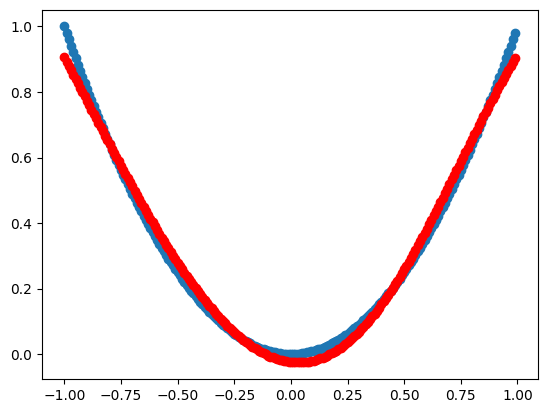

In [35]:
# plt.scatter(x,y)
# plt.scatter(x,rst,color = 'r')
# plt.show()

# 4 layer

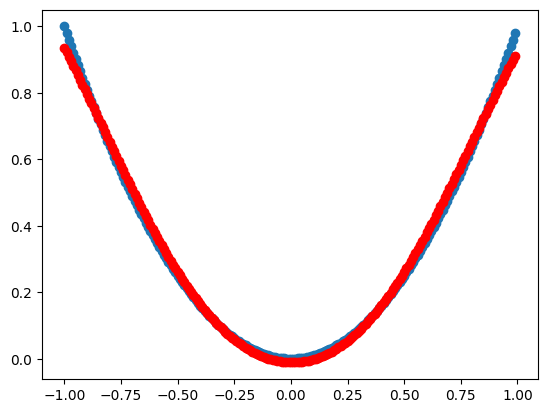

In [45]:
plt.scatter(x,y)
plt.scatter(x,newRst,color = 'r')
plt.show()

# 6 layer

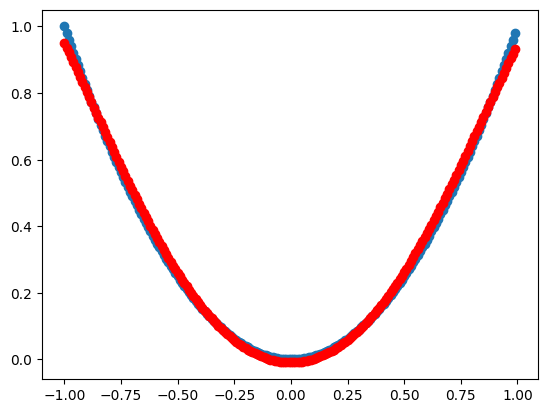

In [57]:
plt.scatter(x,y)
plt.scatter(x,sixLayerRst,color = 'r')
plt.show()

# 테스트셋으로 평가

In [58]:
x= np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

In [62]:
x.shape

(200,)

In [61]:
#데이터 분리
split_index = int(x.shape[0]*0.7) 
split_index

140

In [67]:
# 데이터 분리 처리 
train_x, test_x = x[:split_index], x[split_index:,]
train_y, test_y = y[:split_index], y[split_index:,]

In [68]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((140,), (60,), (140,), (60,))

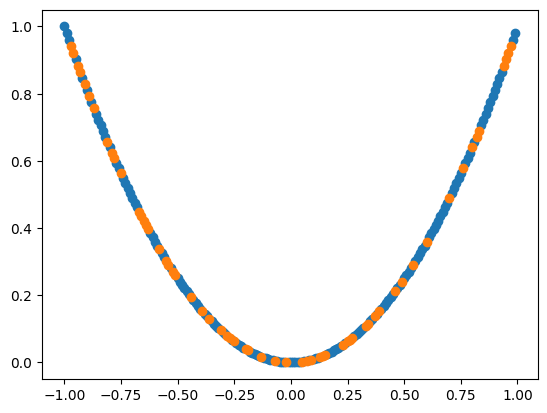

In [75]:
#데이터를 shuffle 했을 떄 데이터 
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.savefig('img_test.png')

# 저장된 이미지를 볼러와서 보여주고 싶은 경우

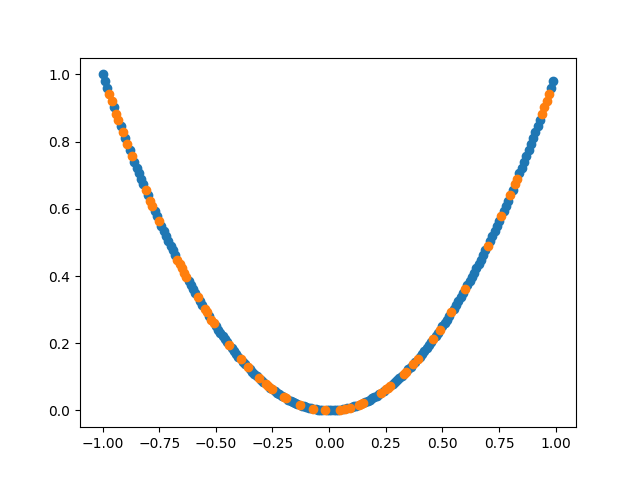

In [76]:
from IPython.display import Image 
display(Image('./img_test.png'))

In [77]:
# 외부 명령어 사용

In [79]:
!dir

 D 드라이브의 볼륨: 백업디스크
 볼륨 일련 번호: 080F-4620

 D:\AI_Backup\cnn_exam 디렉터리

2024-05-20  오전 11:23    <DIR>          .
2024-05-20  오전 11:23    <DIR>          ..
2024-05-20  오전 11:15    <DIR>          .ipynb_checkpoints
2024-05-17  오후 05:30    <DIR>          data
2024-05-20  오전 11:17            23,040 img_test.png
2024-05-17  오후 05:24           775,208 mnist_cnn_20240517_epoch_50_9880.h5
2024-05-17  오후 03:34            15,534 model.png
2024-05-17  오후 01:29            32,274 model_shapes.png
2024-05-17  오후 05:42           276,582 tensorflow_cnn.ipynb
2024-05-20  오전 11:23           143,196 tensorflow_module.ipynb
2024-05-17  오후 01:17            57,325 test.ipynb
2024-05-17  오후 12:49                 0 test.py
               8개 파일           1,323,159 바이트
               4개 디렉터리  30,899,388,416 바이트 남음


# 학습 시간 출력

In [80]:
model = keras.Sequential()
model.add(Dense(10, activation = 'tanh', input_shape = (1,)))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1))

model.compile(optimizer = 'SGD', loss= 'mse', metrics =['mse'])

C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
#시간체크
start_time = time.time() 
model.fit(train_x, train_y,epochs = 500, batch_size = 20, verbose = 0)
print("학습 시간: {}".format(time.time() - start_time))  # .format은 굳이 변수를 만들 필요가 없을 때 사용

학습 시간: 14.379549503326416


# 데이터를 SIN으로 변경해서 처리

In [95]:
#데이터 sin처리 하는 함수 
def get_sin_data(start = 0, end= 10, step= 0.1):
    x = np.arange(start,end,step)
    np.random.shuffle(x)
    y = np.sin(x)

    split_index = int(x.shape[0]*0.6) 
    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]

    return (train_x, train_y),(test_x, test_y)

In [96]:
(train_x, train_y),(test_x, test_y) = get_sin_data(start = 0, end= 10, step= 0.1)

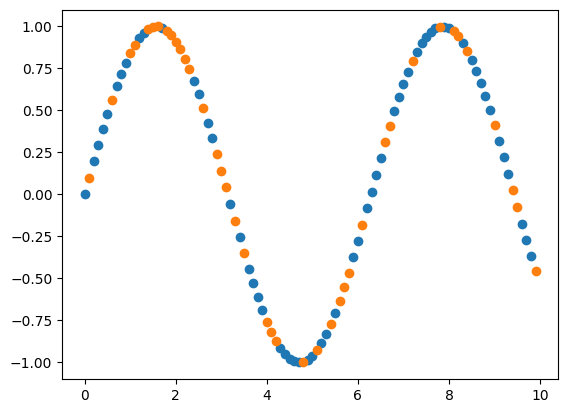

In [97]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

In [98]:
#모델 신규 생성
model1 = keras.Sequential()
model1.add(Dense(10, activation = 'tanh', input_shape=(1,)))
model1.add(Dense(10, activation = 'tanh'))
model1.add(Dense(1))

model1.compile(optimizer = 'SGD', loss = 'mse', metrics = ['mse'])
model1.summary() 

start_time = time.time() 
model1.fit(train_x, train_y, epochs = 1000, verbose = 0, batch_size = 20)
print("학습시간: {}".format(time.time() - start_time))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

학습시간: 24.788044929504395


# 결과 보기

In [99]:
loss, mse = model1.evaluate(test_x, test_y)
print(loss)
print(mse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1504 - mse: 0.1504  
0.152275949716568
0.152275949716568


In [100]:
rst = model1.predict(test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


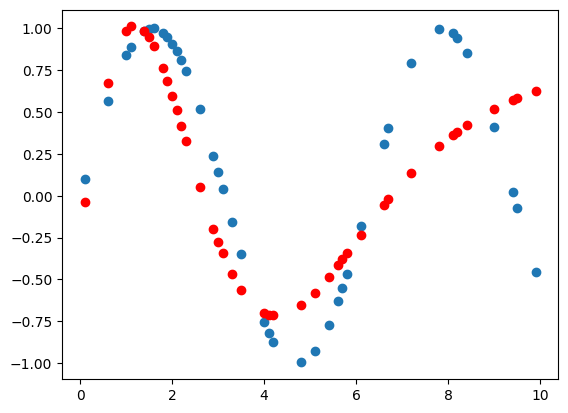

In [101]:
plt.scatter(test_x,test_y)
plt.scatter(test_x, rst, color = 'r')
plt.show()

# 그래프를 조정하여 맞추는 방법

0번째 학습중...
학습시간: 24.002180576324463
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


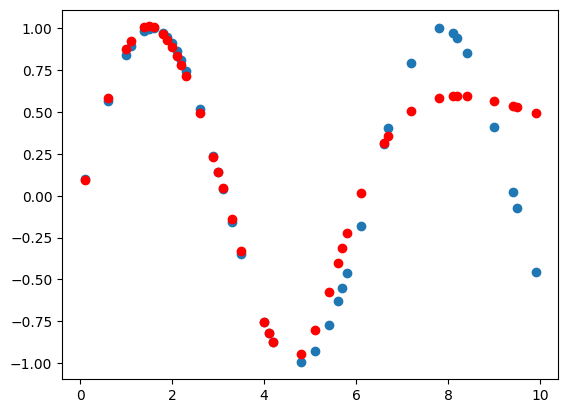

1번째 학습중...
학습시간: 24.51812767982483
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


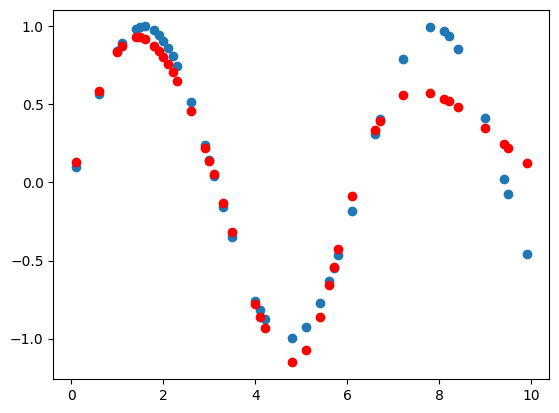

2번째 학습중...
학습시간: 25.210468769073486
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


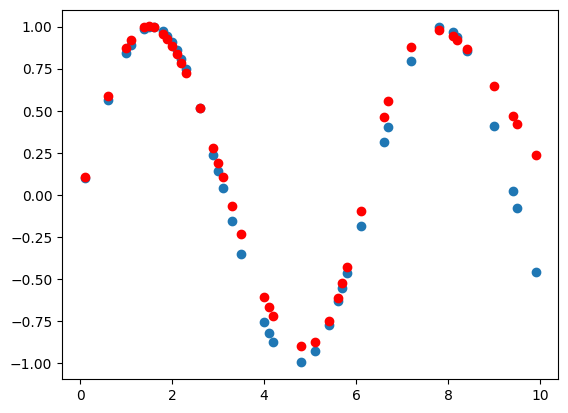

3번째 학습중...
학습시간: 24.850388765335083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


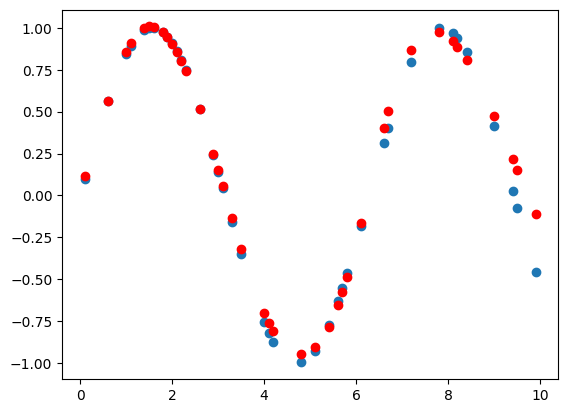

4번째 학습중...
학습시간: 24.450271129608154
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


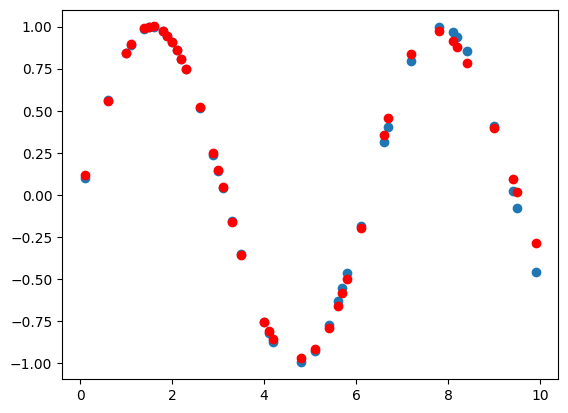

5번째 학습중...
학습시간: 24.37973165512085
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


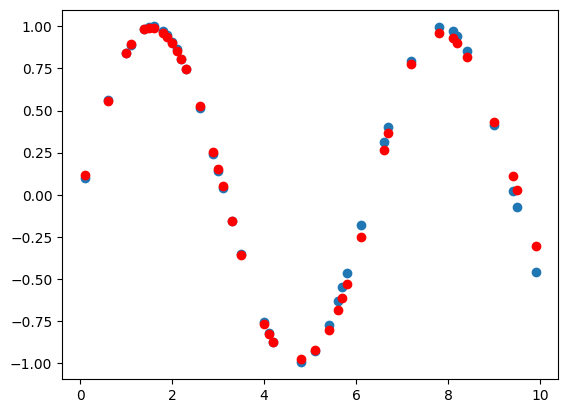

6번째 학습중...
학습시간: 24.0992534160614
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


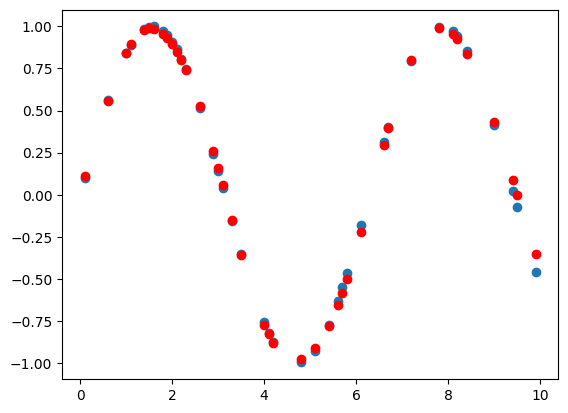

7번째 학습중...
학습시간: 24.124022006988525
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


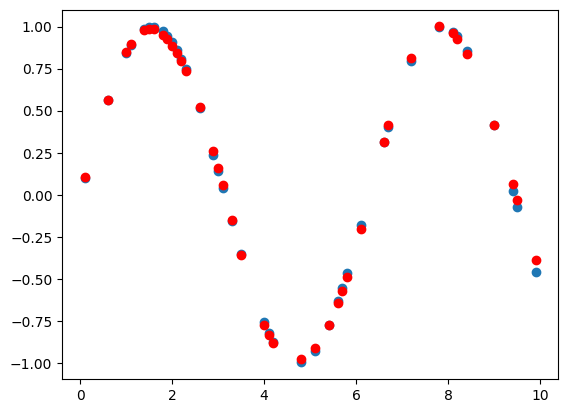

8번째 학습중...
학습시간: 24.805630445480347
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


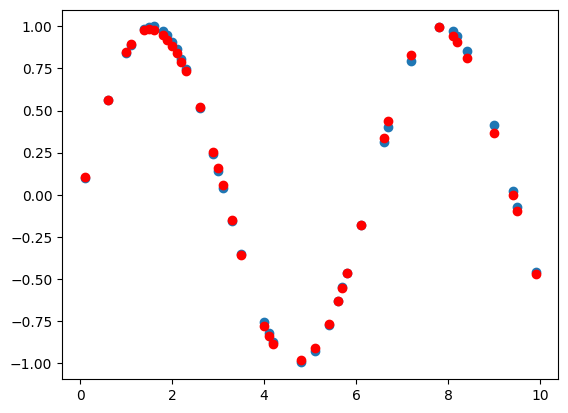

9번째 학습중...
학습시간: 24.787131547927856
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


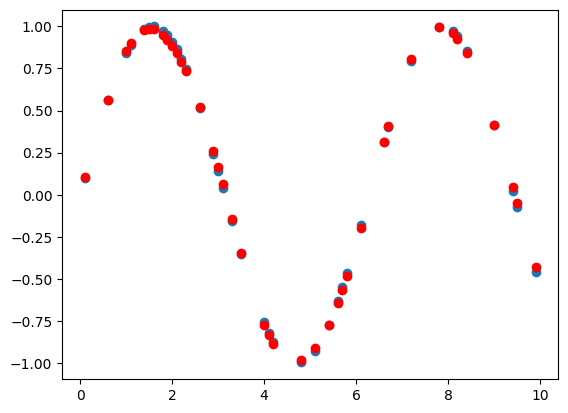

In [104]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size= 20):
    start_time = time.time()
    model.fit(train_x, train_y, epochs = 1000, verbose = 0, batch_size = 20)
    print("학습시간: {}".format(time.time() - start_time))

    rst = model.predict(test_x)
    plt.scatter(test_x,test_y)
    plt.scatter(test_x, rst, color = 'r')
    plt.show()

def fit_n_times(model,train_x, train_y, test_x, test_y, n):
    for i in range(n):
        print(f"{i}번째 학습중...")
        fit_one_more(model, train_x, train_y, test_x, test_y)

fit_n_times(model1,train_x, train_y, test_x, test_y, 10)

# GPU가 있는 경우 [batch 개수가 1,2,5,10,20,50,100]

In [106]:
def build_model():
    model = keras.Sequential() 
    model.add(Dense(10, activation = 'tanh', input_shape = (1,)))
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(1))

    model.compile(optimizer= 'SGD', loss = 'mse', metrics = ['mse'])

    return model 

def fit_batch_size(train_x, train_y, test_x, test_y, batch):
    model = build_model()
    print(f"배치 사이즈 크지: {batch}")
    fit_one_more(model, train_x, train_y, test_x, test_y, batch)

배치 사이즈 크지: 1
학습시간: 24.386726140975952
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


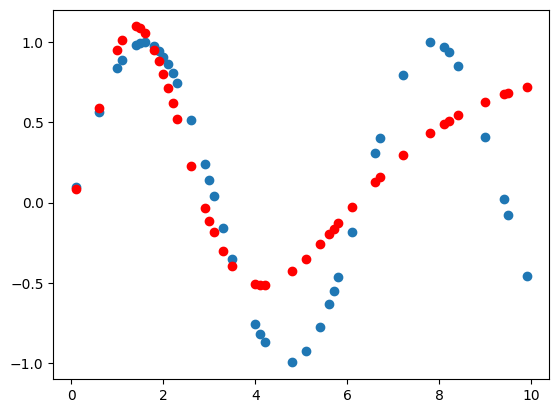

배치 사이즈 크지: 2
학습시간: 24.916372299194336
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


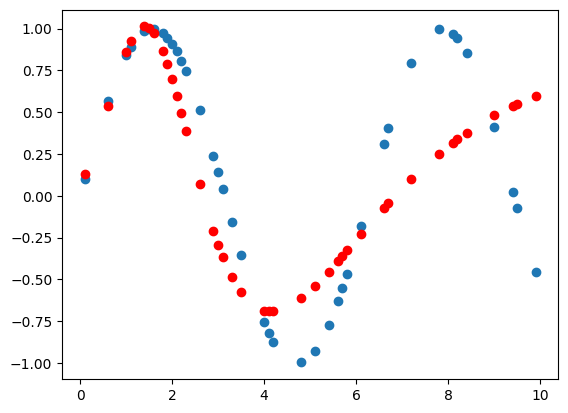

배치 사이즈 크지: 5
학습시간: 25.40254044532776
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


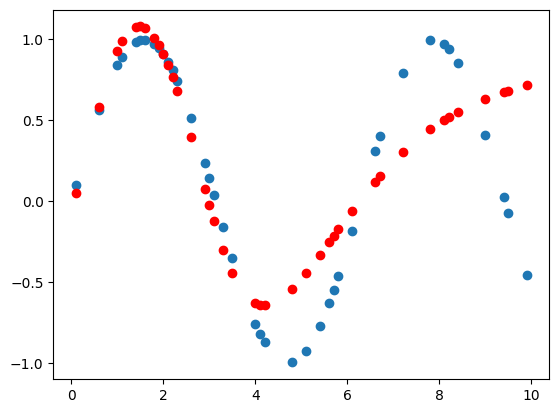

배치 사이즈 크지: 10
학습시간: 25.009940147399902
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


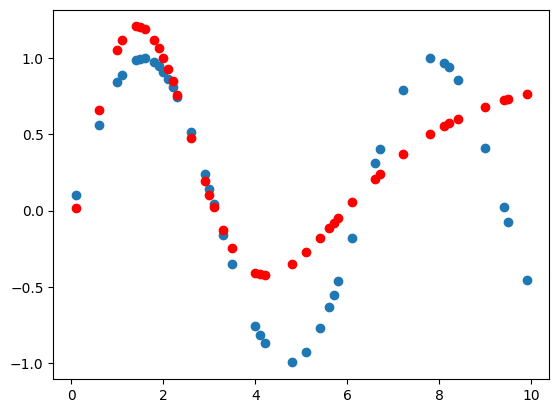

배치 사이즈 크지: 20
학습시간: 25.211299180984497
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


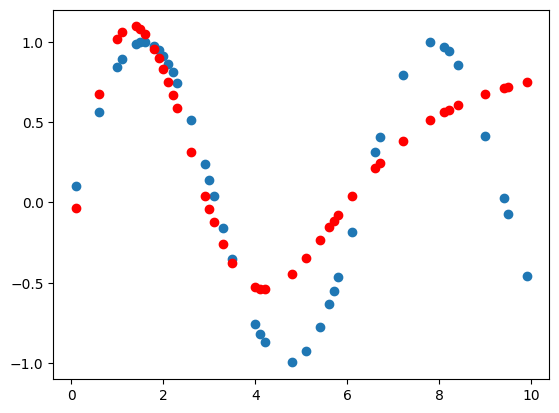

배치 사이즈 크지: 50
학습시간: 24.42967939376831
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


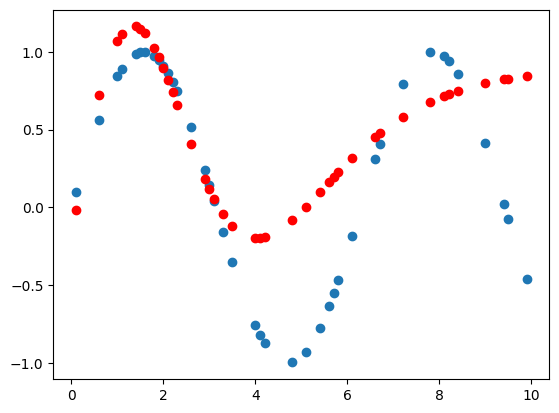

배치 사이즈 크지: 100
학습시간: 24.996618032455444
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


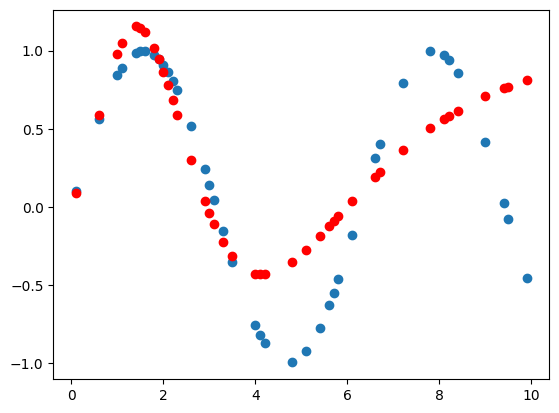

In [107]:
batchList = [1,2,5,10,20,50,100]

for i in batchList:
    fit_batch_size(train_x, train_y, test_x, test_y, i)

In [108]:
(train_x, train_y),(test_x, test_y) = get_sin_data(start = 0, end= 10, step= 0.1)

In [113]:
model2 = keras.Sequential() 
model2.add(Dense(10, activation = 'tanh', input_shape = (1,)))
model2.add(Dense(10, activation = 'tanh'))
model2.add(Dense(1))

model2.compile(optimizer = 'SGD', loss= 'mse', metrics = ['mse'])

start_time = time.time()
history = model2.fit(train_x, train_y, epochs = 100, verbose =2, batch_size= 20)
print("학습시간: {}".format(time.time()- start_time))

Epoch 1/100
3/3 - 0s - 167ms/step - loss: 1.3116 - mse: 1.3116
Epoch 2/100
3/3 - 0s - 8ms/step - loss: 0.5853 - mse: 0.5853
Epoch 3/100
3/3 - 0s - 6ms/step - loss: 0.4345 - mse: 0.4345
Epoch 4/100
3/3 - 0s - 6ms/step - loss: 0.4153 - mse: 0.4153
Epoch 5/100
3/3 - 0s - 11ms/step - loss: 0.4001 - mse: 0.4001
Epoch 6/100
3/3 - 0s - 11ms/step - loss: 0.3962 - mse: 0.3962
Epoch 7/100
3/3 - 0s - 11ms/step - loss: 0.3922 - mse: 0.3922
Epoch 8/100
3/3 - 0s - 11ms/step - loss: 0.3892 - mse: 0.3892
Epoch 9/100
3/3 - 0s - 6ms/step - loss: 0.3942 - mse: 0.3942
Epoch 10/100
3/3 - 0s - 6ms/step - loss: 0.3870 - mse: 0.3870
Epoch 11/100
3/3 - 0s - 7ms/step - loss: 0.3855 - mse: 0.3855
Epoch 12/100
3/3 - 0s - 24ms/step - loss: 0.3866 - mse: 0.3866
Epoch 13/100
3/3 - 0s - 8ms/step - loss: 0.3791 - mse: 0.3791
Epoch 14/100
3/3 - 0s - 11ms/step - loss: 0.3768 - mse: 0.3768
Epoch 15/100
3/3 - 0s - 10ms/step - loss: 0.3794 - mse: 0.3794
Epoch 16/100
3/3 - 0s - 6ms/step - loss: 0.3718 - mse: 0.3718
Epoch 17

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


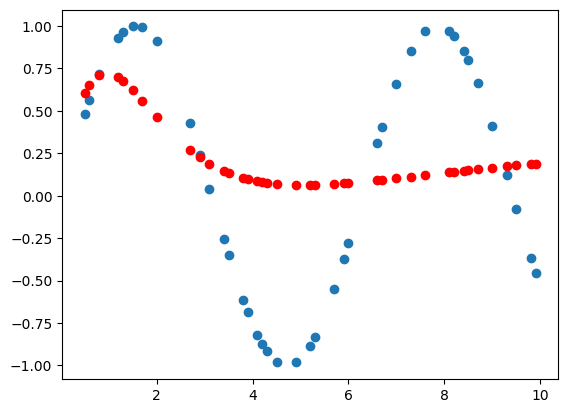

In [114]:
rst = model2.predict(test_x)
plt.scatter(test_x, test_y)
plt.scatter(test_x, rst, color = 'r' )

# step 변화에 따라 predict 값 변화 (overfit)

In [121]:
(train_x, train_y),(test_x, test_y) = get_sin_data(start = 0, end= 10, step= 0.001)

In [122]:
model3 = keras.Sequential() 
model3.add(Dense(10, activation = 'tanh', input_shape = (1,)))
model3.add(Dense(10, activation = 'tanh'))
model3.add(Dense(1))

model3.compile(optimizer = 'SGD', loss= 'mse', metrics = ['mse'])

start_time = time.time()
history = model3.fit(train_x, train_y, epochs = 100, verbose =0, batch_size= 20)
print("학습시간: {}".format(time.time()- start_time))

학습시간: 91.28171420097351


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


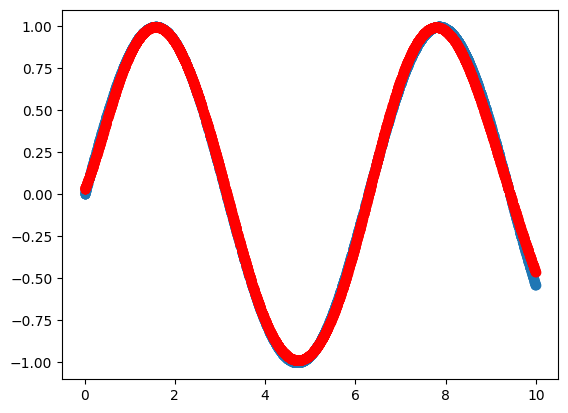

In [123]:
rst3 = model3.predict(test_x)
plt.scatter(test_x, test_y)
plt.scatter(test_x, rst3, color = 'r' )

# Overfitting, Dropout, BatchNormalization, Regularization 처리하는 방법

In [125]:
from sklearn.datasets import make_moons

In [194]:
x,y = make_moons(n_samples = 200, noise = 0.2, random_state = 64)

In [136]:
df = pd.DataFrame(dict(x=x[:,0], y = x[:,1], label = y))
df

,x,y,label
0,-0.433285,0.888269,0
1,1.531885,-0.860259,1
2,0.076839,0.943502,0
3,1.260555,-0.283813,1
4,0.944397,0.305758,0
...,...,...,...
195,0.144641,0.974636,0
196,-0.076464,0.847381,0
197,1.389536,-0.283713,1
198,0.465793,0.008331,1


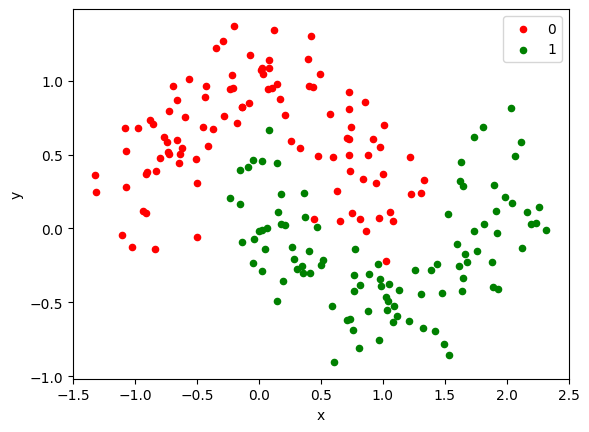

In [139]:
fig, ax = plt.subplots()
groups = df.groupby('label')
colors = ['red','green']
for idx, group in groups:
    group.plot(ax=ax, kind = 'scatter', x= 'x', y = 'y', label = idx, color = colors[idx])
plt.show()

# 데이터 train test 분리

In [158]:
split_index = int(len(x) * 0.7) 
print(split_index)
train_x, test_x = x[:split_index], x[split_index:,]
train_y, test_y = y[:split_index], y[split_index:,]

print(train_x.shape)

140
(140, 2)


In [159]:
(train_x.shape, train_y.shape), (test_x.shape, test_y.shape)

(((140, 2), (140,)), ((60, 2), (60,)))

In [177]:
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import L1, L2
model5 = keras.Sequential() 
model5.add(Dense(20,input_shape=(2,), activation = 'relu', kernel_regularizer =l2(0.001)))
model5.add(Dropout(0.3))
model5.add(BatchNormalization()) # local optimum 문제에서 빠져 나올 수 있도록 
model5.add(Dense(20, activation = 'relu'))
model5.add(Dropout(0.3))
model5.add(Dense(1, activation = 'sigmoid'))

model5.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

history = model5.fit(train_x, train_y, epochs = 1000, batch_size = 100,verbose = 0, validation_data = (test_x, test_y))


#### ACCURACY as Metric

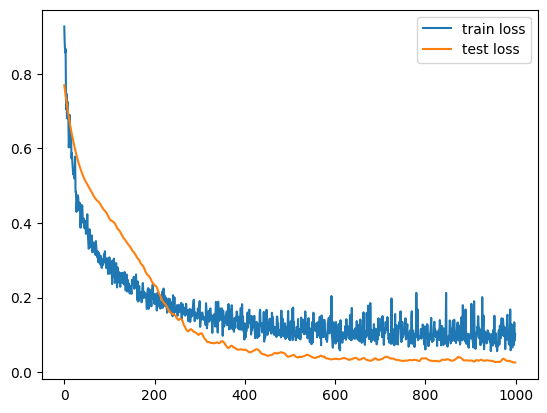

In [178]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend() 
plt.show()

#### RECALL as Metric

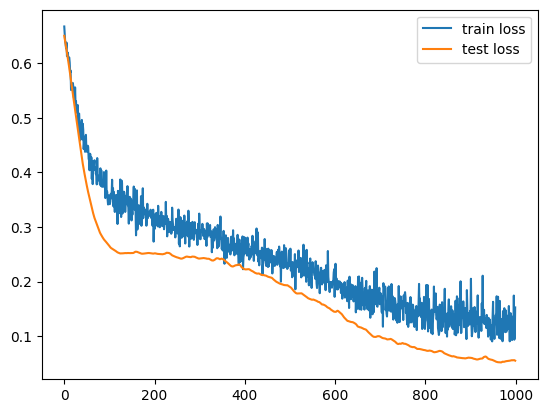

In [172]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend() 
plt.show()

# 콜백함수

In [206]:
#학습 중 다양한 명령을 수행하고 싶을 떄 사용하는 함수
from tensorflow.keras.callbacks import Callback


In [207]:
split_index = int(x.shape[0]*0.6) 

train_x, test_x = x[:split_index,], x[split_index:]
train_y, test_y = y[:split_index,], y[split_index:]

In [213]:
#콜백함수 생성
def train_callbacks(callbacks):
    model = keras.Sequential()
    model.add(Dense(10, activation = 'tanh', input_shape= (2,))) 
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])
    start_time = time.time()
    model.fit(train_x, train_y, epochs = 1000, batch_size = 20, validation_split = 0.1, verbose = 0, callbacks = callbacks)
    print("학습 시간: {}".format(time.time()- start_time))

In [214]:
from tensorflow.keras.callbacks import ModelCheckpoint 

In [215]:
check_point = ModelCheckpoint("./best_model_h5.keras", monitor = 'val_loss', mode = "auto", save_best_only = True)

In [216]:
train_callbacks([check_point])

학습 시간: 58.6113007068634


# 디스플레이 처리

In [212]:
from IPython.display import clear_output

In [224]:
class PlotLosses(Callback):
    def on_train_begin(self, logs = {}):
        self.i = 0 
        self.x = []
        self.losses =[] 
        self.val_losses = [] 

        self.fig = plt.figure() 
        self.logs = [] 

    def on_epoch_end(self, epoch, logs = {}):
        self.logs.append(logs) 
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait = True)
        plt.plot(self.x, self.losses, label = 'loss')
        plt.plot(self.x, self.val_losses, label = "val_loss")
        plt.legend()
        plt.show()
        print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])
        

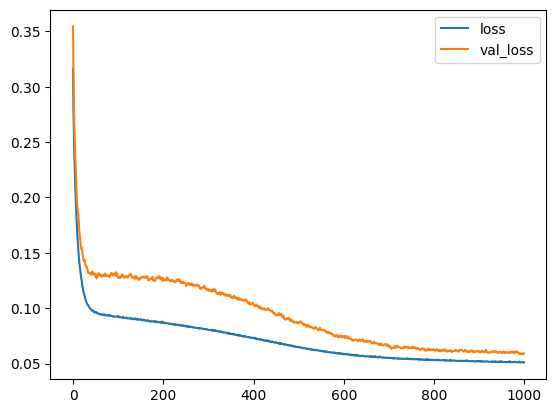

loss =  0.05097821354866028 , val_loss =  0.059187352657318115
학습 시간: 282.2992510795593


In [225]:
plt_loss = PlotLosses() 
train_callbacks([plt_loss])